## 1. Introduction to the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ted = pd.read_csv('data/ted.csv')
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
ted.shape, ted.columns

((2550, 17),
 Index(['comments', 'description', 'duration', 'event', 'film_date',
        'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
        'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
        'url', 'views'],
       dtype='object'))

In [6]:
ted.dtypes
#object dtypes can be lists or dictionaries as well.

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [5]:
#to find the number of missing values in each column.
#using isna() instead of isnull() to keep consistent with the fillna(), dropna() notation
ted.isna().sum()  

#the sum of boolean values is done along the 0-axis, ie, the row axis
#which in turn gives the column sum

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## 2. Which talks provoke the most online discussion?

In [26]:
#the first idea might be to sort by number of comments and take the last five.
ted.sort_values(['comments']).tail(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437,0.000977,1023.074195
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291


In [19]:
#There could be several problems with this:
#a) Data about the number of subcomments is not available
#b) There could be data that's not in the table, that is essential to deciding this.
#c) Most importantly, the time for which the video has been live is crucial.
ted['comments_per_view'] = ted['comments'] / ted['views']

#we'd like to normalize the comments with the views. The reasoning behind this
#is : when a person views a video, if they do / don't comment, that could
#indicate how productive the video is. This intuition can be quantified 
#through 'comments_per_view'
ted.sort_values(['comments_per_view']).tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [20]:
#to make the values more interpretable we may invert the above to views/comment
ted['views_per_comment'] = ted['views'] / ted['comments']

In [25]:
ted.sort_values(['views_per_comment']).head(3)
#easier to interpret : eg for the first row, 
#it takes around 450 views to generate a comment
#or 1 in 450 people comment on this TED talk.

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291


In [27]:
#Take aways ;
#Consider the limitations and biases of your data when analyzing it(eg. lack of subcomment data)
#Make your results understandable / interpretable.

## 3. Visualize the distribution of comments

Text(0, 0.5, 'Number of first level comments')

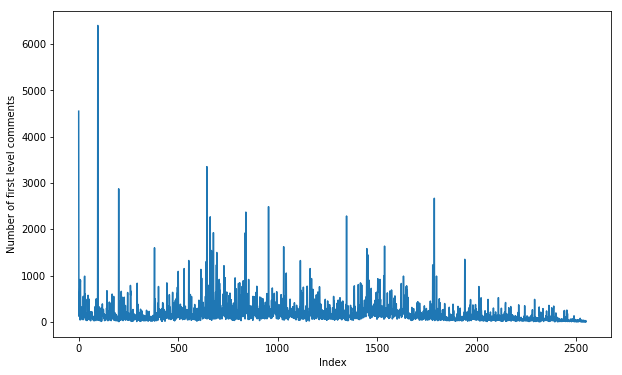

In [39]:
fig = plt.figure(figsize = (10, 6))
plt.plot(ted.comments)
plt.xlabel('Index')
plt.ylabel('Number of first level comments')
#but this line plot is usually used when something varies with time, 
#which is not the case here, so we shall shift to a more frequency related plot.

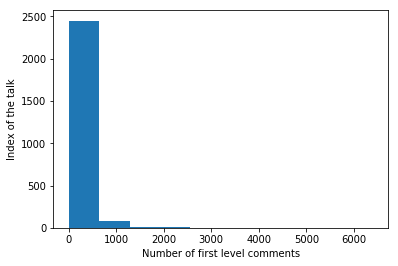

In [51]:
plt.hist(ted.comments)
plt.xlabel('Number of first level comments')
plt.ylabel('Index of the talk')
plt.show()

In [58]:
#we see from the above plot that most talks tend to have less than 1000 comments or so.
#most of our data seems to be on the left side of the plot
#lets take a closer look, by filtering out just the left side of the plot.
#because less than thousand means, the majority of the talk could be 
#getting 50 comments or 500 comments, we dont know yet

#first of all let us confirm our intutition that most of the data is on the left
ted[ted.comments >= 1000].shape

#we see there are only around 32 talks that have more than a 1000 comments

(32, 19)

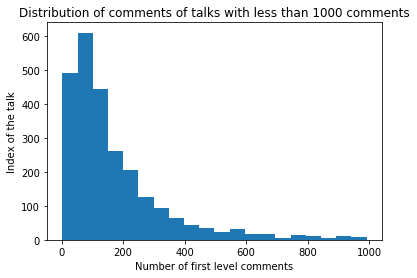

In [60]:
"""
other ways to duplicate the same plot.
ted[ted.comments < 1000].comments.plot(kind = 'hist')
ted.query('comments < 1000').comments.plot(kind = 'hist')

#ted.loc[rows you want, columns you want].'plot it as a histogram'
ted.loc[ted.comments < 1000, 'comments'].plot(kind = 'hist')
"""

#having confirmed our suspicions, let's look closer at the juicer part of the data
plt.hist(ted[ted['comments'] < 1000]['comments'], bins = 20)
plt.title('Distribution of comments of talks with less than 1000 comments')
plt.xlabel('Number of first level comments')
plt.ylabel('Index of the talk')
plt.show()

#we see that 50-100 comments is more common than 0-50 comments

In [ ]:
#Take Aways:

#1)
#you choose your plot type depending on the question you answer and the data you work on"
#a short overview would be
#histograms  => distributions
#barplots => comparing categories
#lineplots => time-series
#scatter => compare multiple numeric variables

#2)
#read more on viz docs of pandas
#you could use pandas plot for faster and easier plots 
#however this is is mostly useful during eda plots

#otherwise plt is much better, since they are much more customizable

#3)
#try modifying plot defaults

#4)
#creating plots involve decision-making, since a viz is by definition a summary.
#while its easy to constructing misleading vizs, we still need to make informed 
#decision to create viz, since any single viz can't show everything in the data